# Pymaceuticals Inc.
---

### Analysis

- Based on the data, we can determine that the tumor treatments are effective. The number of tumors in the placebo group increased rather than decreasing. Which is to be expected because these mice were not given any treatment. There appears to be a moderate positive correlation between the weight of the mice and the average tumor volume. Overall Capomulin seemed to be the most effective drug regimen, with the amount of tumors sygnificantly decreasing with each timepoint. The second most effective drug seemed to be Ramicane, with a low mean tumor volume and a high number of observed timepoints. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import pprint as pp
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
all_data=pd.merge(study_results, mouse_metadata, how='left', on=["Mouse ID"])


# Display the data table for preview
all_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count=all_data["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
ID_Timepoint=all_data[all_data.duplicated(subset= ["Mouse ID", "Timepoint"], keep='first')]
ID_Timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID.


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
dropped_ID= all_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
dropped_ID.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count= dropped_ID["Mouse ID"].nunique()
clean_mouse_count

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group=all_data.groupby("Drug Regimen")
tumor_mean=drug_group["Tumor Volume (mm3)"].mean()
tumor_median=drug_group["Tumor Volume (mm3)"].median()
tumor_var=drug_group["Tumor Volume (mm3)"].var()
tumor_std=drug_group["Tumor Volume (mm3)"].std()
tumor_sem=drug_group["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
tumor_groups= pd.DataFrame({
    "Mean Tumor Volume": tumor_mean,
  "Median Tumor Volume": tumor_median,
   "Tumor Volume Variance": tumor_var,
    "Tumor Volume Std. Dev.":tumor_std,
    "Tumor Volume Std. Err.":tumor_sem
})
tumor_groups["Mean Tumor Volume"] = tumor_groups["Mean Tumor Volume"].map("{:.2f}".format)
tumor_groups["Median Tumor Volume"] = tumor_groups["Median Tumor Volume"].map("{:.2f}".format)
tumor_groups["Tumor Volume Variance"] = tumor_groups["Tumor Volume Variance"].map("{:.2f}".format)
tumor_groups["Tumor Volume Std. Dev."] = tumor_groups["Tumor Volume Std. Dev."].map("{:.2f}".format)
tumor_groups["Tumor Volume Std. Err."] = tumor_groups["Tumor Volume Std. Err."].map("{:.2f}".format)
tumor_groups

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_group=all_data.groupby("Drug Regimen")
tumor_groups=drug_group["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_groups

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

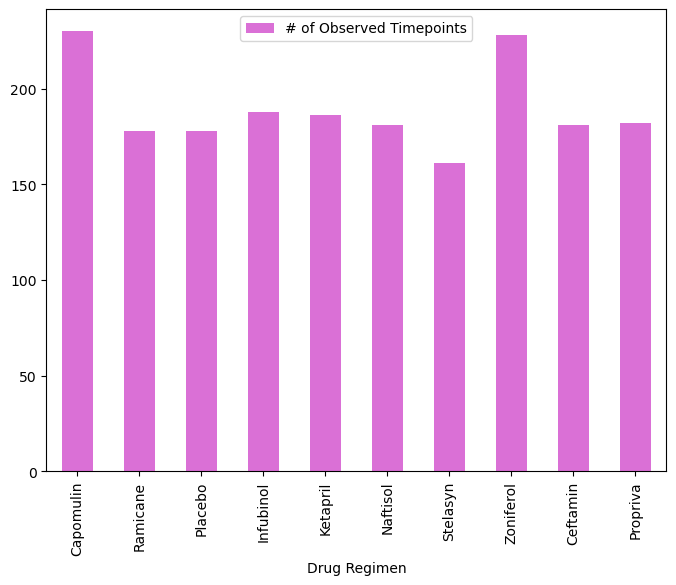

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_timepoint=drug_group.size()
drug_regimen = ["Capomulin", "Ramicane", "Placebo", "Infubinol","Ketapril","Naftisol","Stelasyn","Zoniferol","Ceftamin", "Propriva"]
items={"Drug Regimen": drug_regimen, "# of Observed Timepoints": mouse_timepoint}
bar_plot=pd.DataFrame(items)
bar_plot.plot(x="Drug Regimen",y="# of Observed Timepoints", kind="bar", color="orchid", figsize=(8,6))
plt.xlabel="Drug Regimen"
plt.ylabel="# of Observed Timepoints"
plt.show()

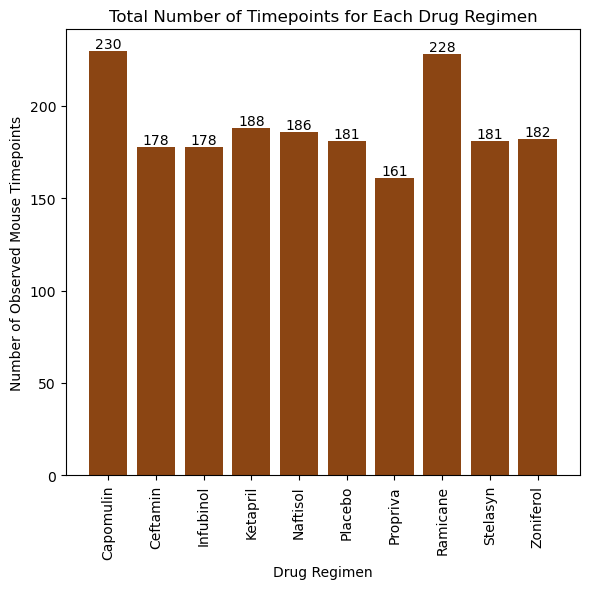

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

mouse_timepoint = drug_group.size()

drug_regimen = mouse_timepoint.index.tolist()
fig, ax = plt.subplots(figsize=(6, 6))
bars = ax.bar(range(len(drug_regimen)), mouse_timepoint, color="saddlebrown", align="center")

# Customize the plot
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Number of Observed Mouse Timepoints")
ax.set_title("Total Number of Timepoints for Each Drug Regimen")
ax.set_xticks(range(len(drug_regimen)))
ax.set_xticklabels(drug_regimen, rotation=90)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height}',
            ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

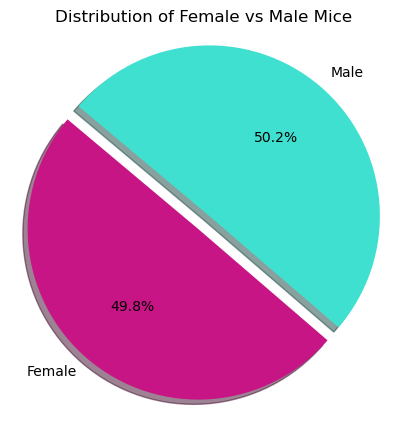

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

gendercount = all_data['Mouse ID'].groupby(all_data['Sex']).nunique() # Create a pie chart 
plt.figure(figsize=(5, 5)) 
plt.pie(gendercount, labels=['Female', 'Male'], explode=(0.1, 0), 
        colors=["mediumvioletred", "turquoise"], 
        autopct='%1.1f%%', shadow=True, startangle=140) 
plt.title("Distribution of Female vs Male Mice") 
plt.axis('equal')
plt.show()

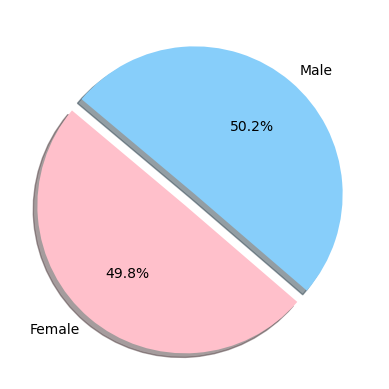

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
labels = ["Female","Male"]
slices = [124, 125]
# Get the unique mice with their gender
gender=all_data.groupby("Sex")
gender.nunique()
colors=["pink","lightskyblue"]
explode = (0.1, 0)
# Make the pie chart
plt.pie(slices, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset
# Determine outliers using upper and lower bounds

import pandas as pd
import numpy as np
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
last_timepoint = all_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
 
merged_data = pd.merge(all_data, last_timepoint, on=['Mouse ID', 'Timepoint'], suffixes=('', '_max'))
 
#Filter
final_tumor_volumes = merged_data[merged_data['Drug Regimen'].isin(treatments)]

tumor_stats = final_tumor_volumes.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

for treatment in treatments:
    treatment_data = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
 
    q1 = treatment_data.quantile(0.25)
    q3 = treatment_data.quantile(0.75)
    iqr = q3 - q1
 
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
 
    print(f"{treatment}'s potential outliers: {outliers}")
 
print(tumor_stats)


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     36.667568  38.125164  32.663378  5.715188  1.143038
Ceftamin      57.753977  59.851956  69.982735  8.365568  1.673114
Infubinol     58.178246  60.165180  74.010875  8.602957  1.720591
Ramicane      36.191390  36.561652  32.166354  5.671539  1.134308


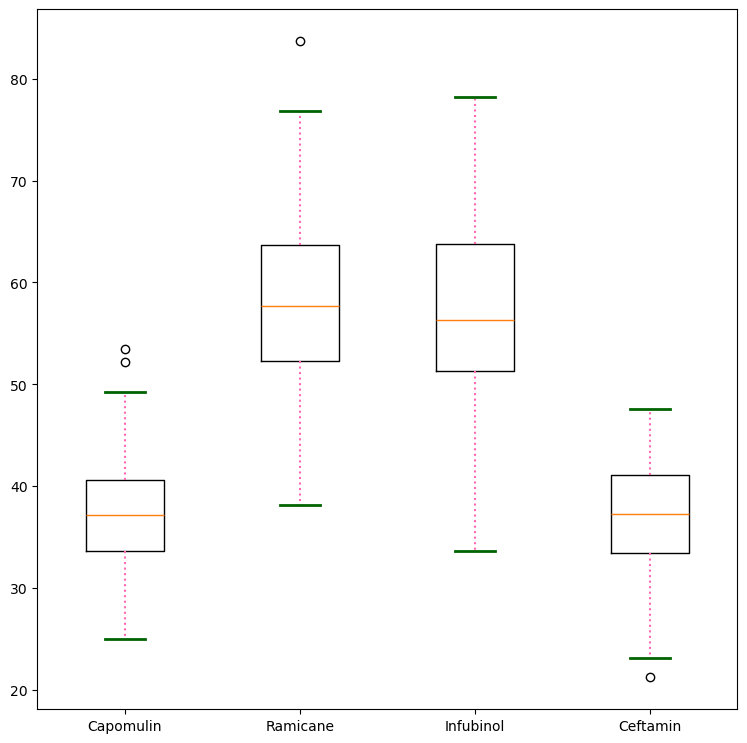

In [14]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt
import numpy as np

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

data_1 = np.random.normal(36.7, 5.7, 100) 
data_2 = np.random.normal(57.7, 8.3, 100)
data_3 = np.random.normal(58.1, 8.6, 100)
data_4 = np.random.normal(36.2, 5.6, 100)
data = [data_1, data_2, data_3, data_4]

fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0, 0, 1, 1])

bp = ax.boxplot(data)

ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

colors = ['darkcyan', 'slategrey', 'wheat', 'darkorchid']


for whisker in bp['whiskers']:
    whisker.set(color='hotpink', linewidth=1.5, linestyle=':')

for cap in bp['caps']:
    cap.set(color='darkgreen', linewidth=2)

plt.show()

## Line and Scatter Plots

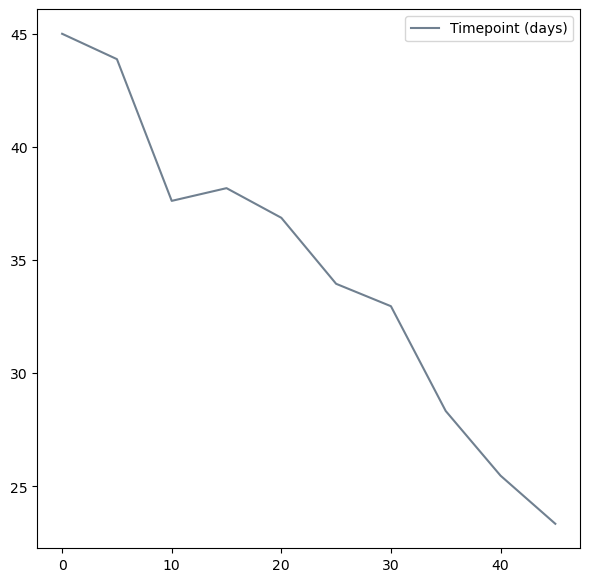

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
all_data['Mouse ID'] == 's185'
mouse_one = 's185'
capomulin_data = all_data[(all_data['Drug Regimen'] == 'Capomulin') & (all_data['Mouse ID'] == mouse_one)]
plt.figure(figsize=(7,7))
plt.plot(capomulin_data["Timepoint"], capomulin_data['Tumor Volume (mm3)'], marker='', color="slategrey", label="Timepoint (days)")
ax.set_title("Treatment of Mouse s185 with Capomulin")
ax.set_xlabel("Timepoint")
ax.set_ylabel("Tumor Volume (mm3)")
plt.legend()
plt.show()

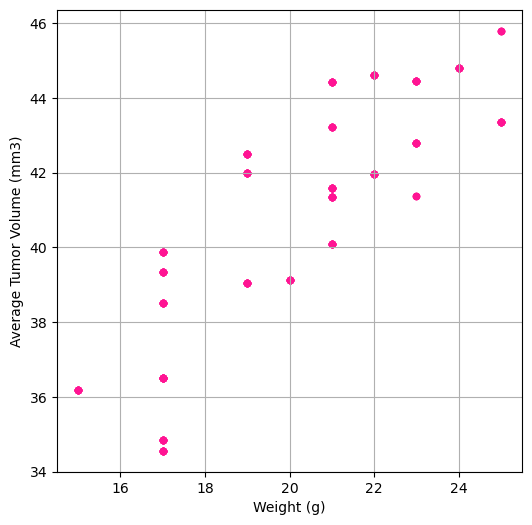

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_all = all_data[all_data['Drug Regimen'] == 'Capomulin']

capomulin_mean = capomulin_all.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
capomulin_mean = capomulin_mean.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})

capomulin_merged = pd.merge(capomulin_all, capomulin_mean, on='Mouse ID')

capomulin_merged.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", grid=True, figsize=(6,6), color='deeppink')
plt.show()


## Correlation and Regression

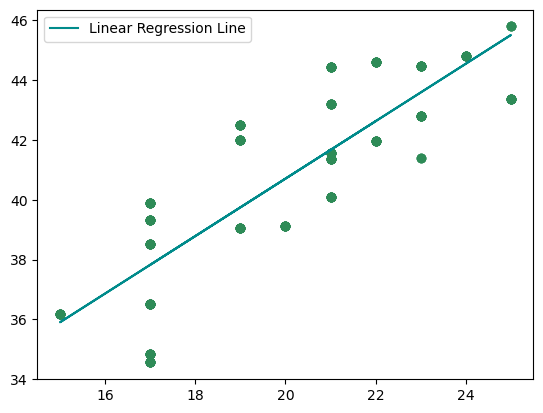

In [17]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
import matplotlib.pyplot as plt
slope, intercept, rvalue, pvalue, stderr= linregress(capomulin_merged["Weight (g)"], capomulin_merged["Average Tumor Volume (mm3)"])
line= slope * capomulin_merged["Weight (g)"] + intercept
capomulin_corr= capomulin_merged["Weight (g)"].corr(capomulin_merged["Average Tumor Volume (mm3)"])
capomulin_corr
plt.scatter(capomulin_merged["Weight (g)"],capomulin_merged["Average Tumor Volume (mm3)"], color="seagreen")
plt.plot(capomulin_merged["Weight (g)"], line, color="darkcyan", label="Linear Regression Line")

#plt.xlabel("weight (g)")
#plt.ylabel("average Tumor Volume (mm3)")
#I commented out the labels because I kept getting an error message when I ran them
plt.legend()
ax.set_title(f"Correlation Coefficient: {capomulin_corr}")
plt.grid=True
plt.show()